# Data visualization with Seaborn

Visualizing data in Python is not complicated, because there are two libraries in Python dedicated to visualization, Matplotlib and Seaborn, that make it easy to do this. So, for this demo lets me show about how to visualize data in Python.

Matplotlib: Python based drawing library, providing full 2D support and partial 3D image support. Matplotlib can be helpful when generating high-quality data in a cross-platform and interactive environment. It can also be used for animation. 

  

Seaborn: This Python library is capable of creating information-rich and beautiful statistical graphs. Seaborn is based on Matplotlib and has multiple features, such as built-in themes, palettes, linear regression data and data matrices, and statistical timing data, which allow us to create complex visualizations. 

I use the ‘Iris dataset’ as an example. The Iris dataset is a commonly used classification experimental dataset collected by Fisher, 1936. The data set contains 150 data sets, which are divided into 3 categories with 50 data in each category and 4 attributes in each data set. You can download it from GitHub (https://gist.github.com/netj/8836201). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Read file and check it 

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


It is difficult to see the specific data distribution from the table, so let's first consider drawing histogram and  scatter diagram (spearl.length and spearl.width): 

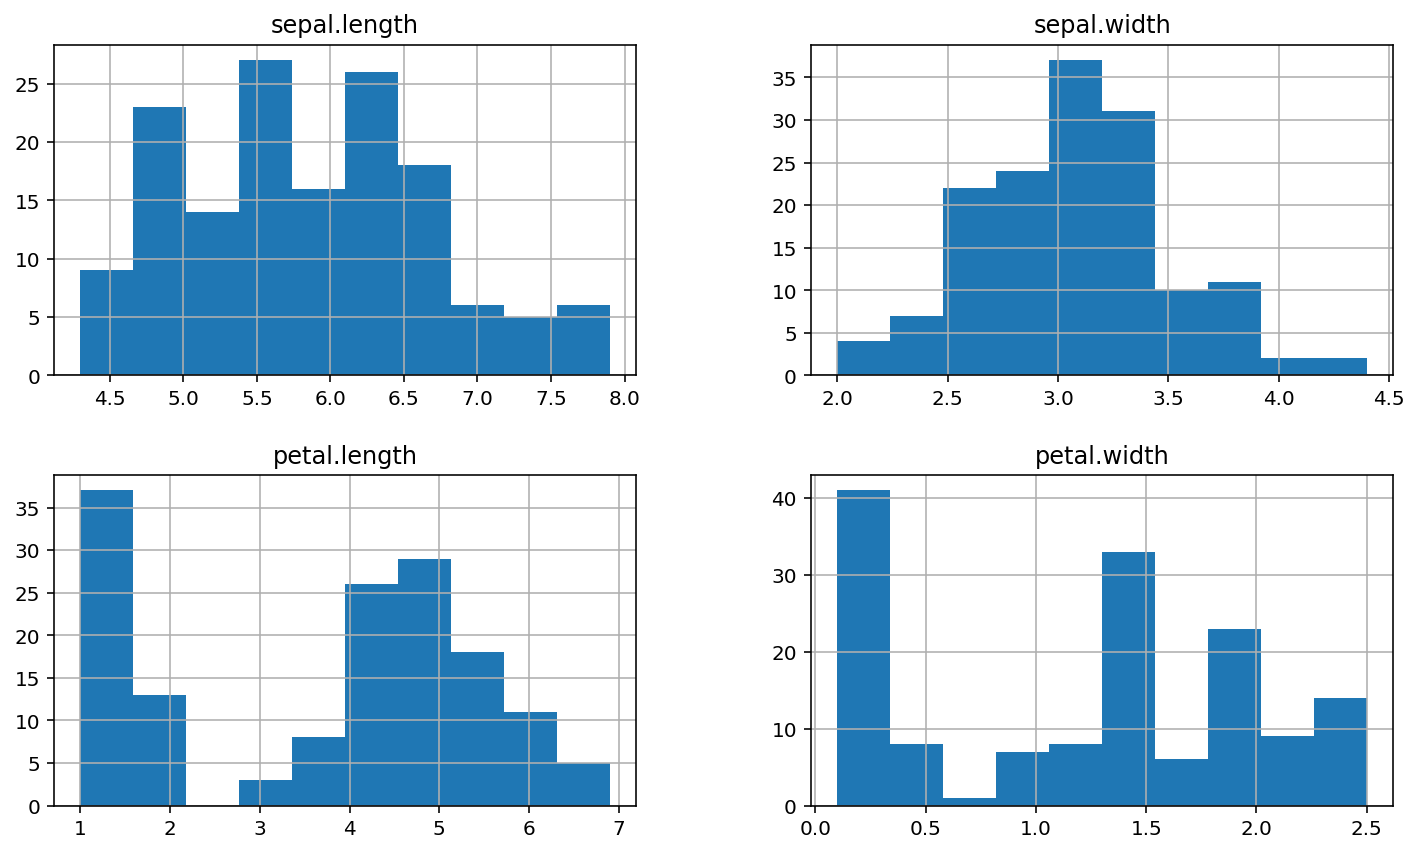

In [6]:
iris.hist()
plt.show()

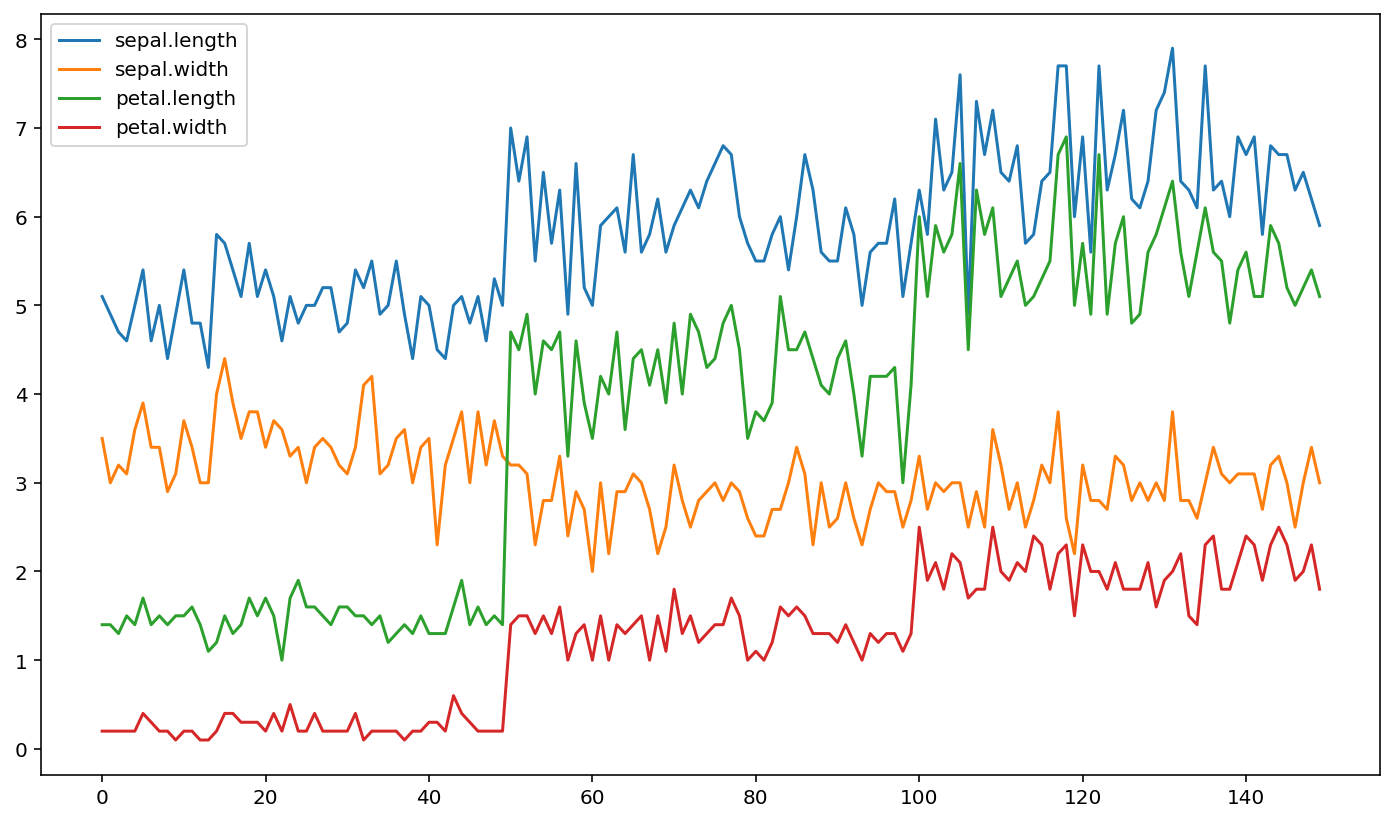

In [21]:
iris.plot()
plt.show()

## Visualization

### Scatter diagram

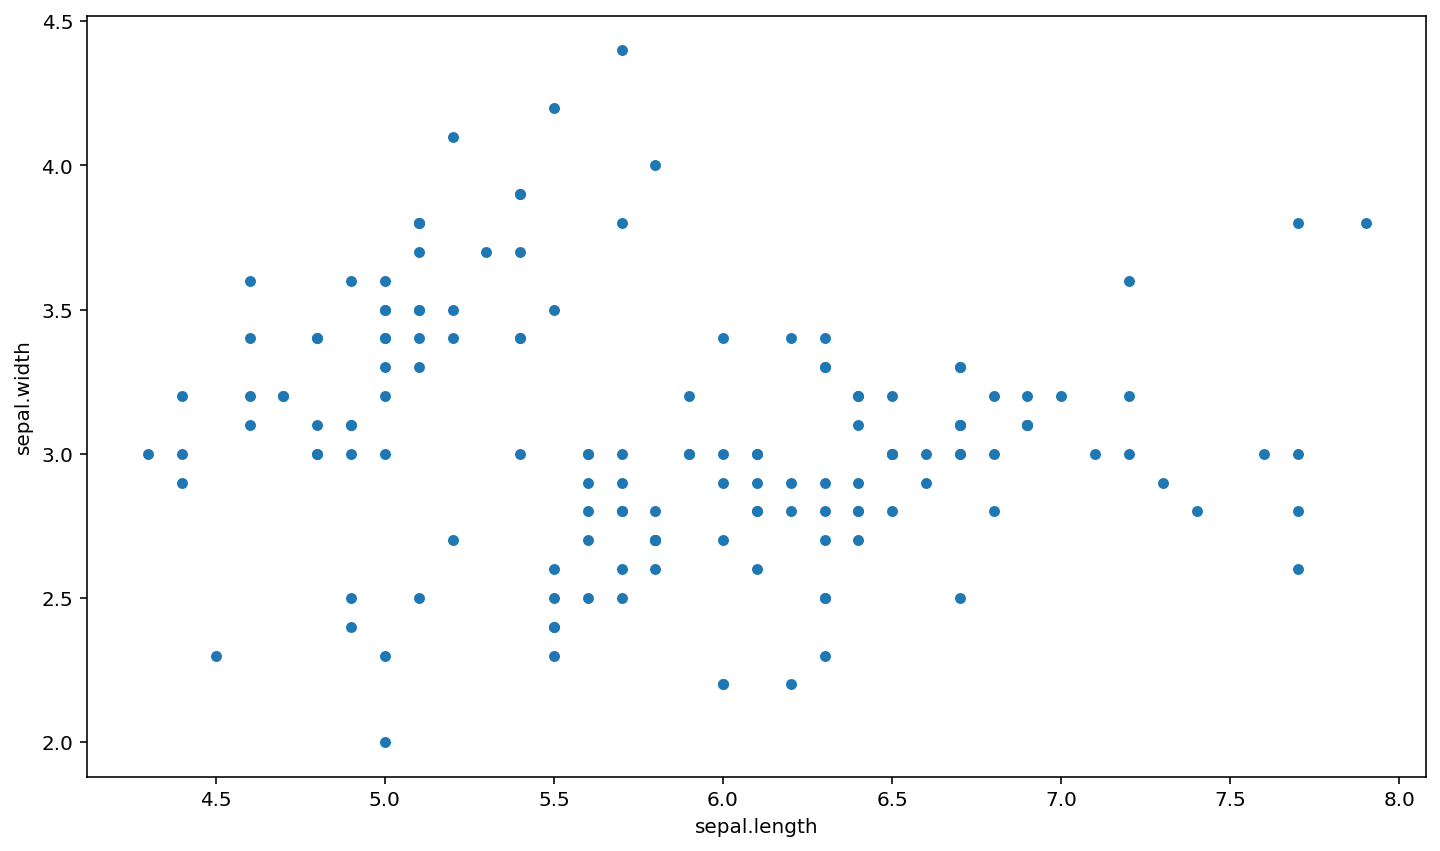

In [8]:
iris.plot(kind="scatter", x="sepal.length", y="sepal.width") 
plt.show()

We also can use seaborn drawing scatter diagram and histogram together, jointplot is the most commonly used tool for correlation analysis.  

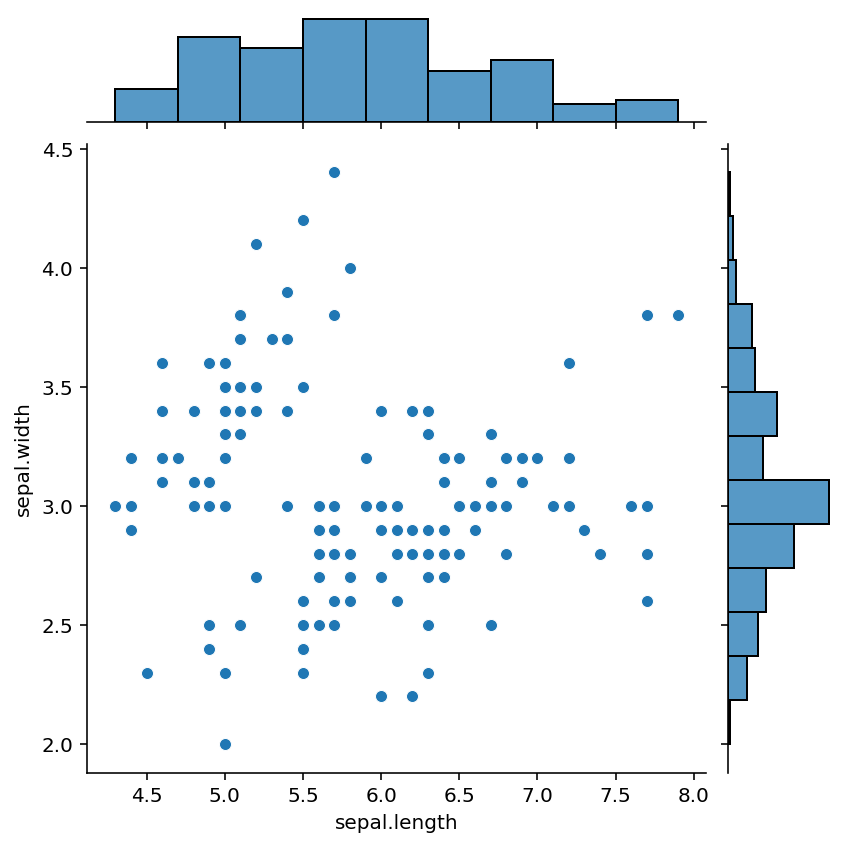

In [10]:
sns.jointplot(x="sepal.length", y="sepal.width", data=iris) 
plt.show()

Even we can add regression lines to the graph by apply kind = ‘reg’  

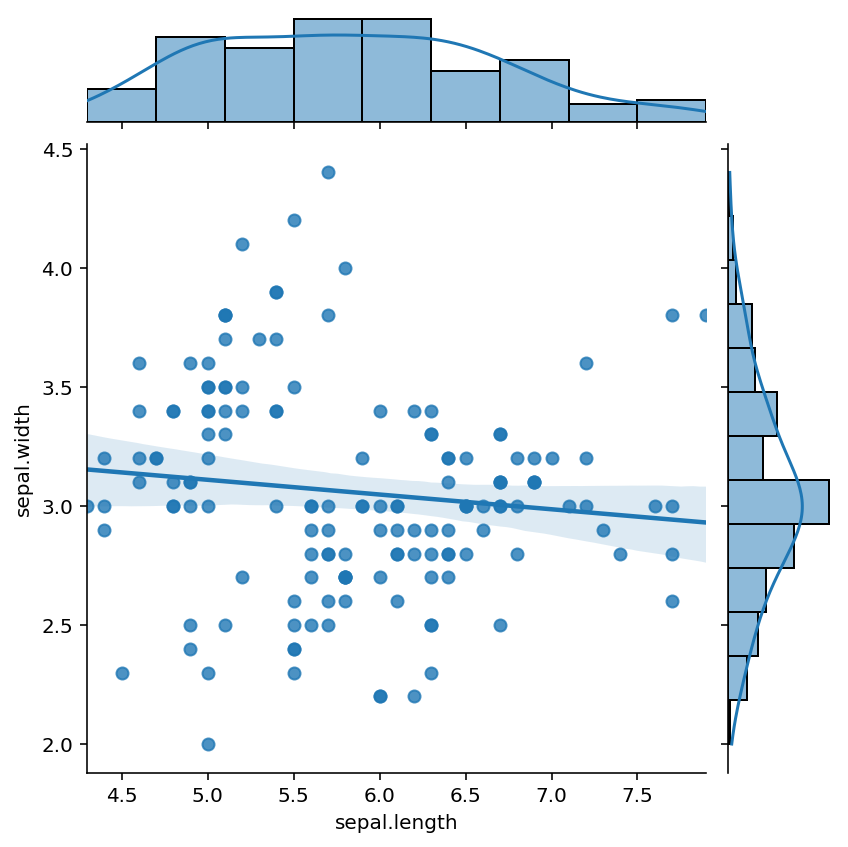

In [12]:
sns.jointplot(x="sepal.length", y="sepal.width", kind = 'reg',data=iris) 
plt.show()

Seaborn's FacetGrid can be used to color the scatter plot to better distinguish the data like:

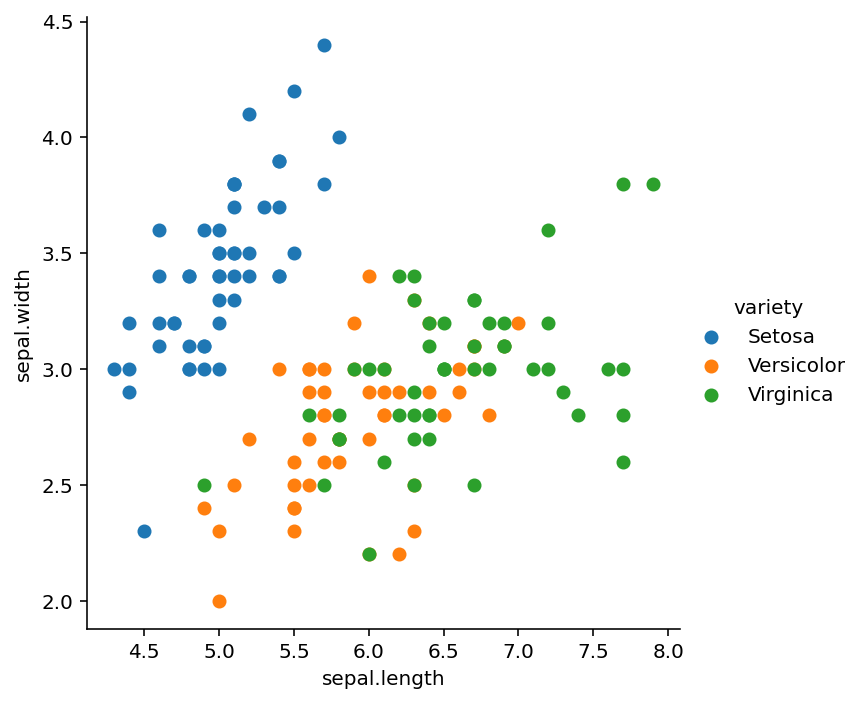

In [15]:
sns.FacetGrid(iris, hue="variety", height=5).map(plt.scatter, "sepal.length", "sepal.width").add_legend() 
plt.show()

### Boxplot

If we want to compare a feature in the data, we can consider using a boxplot. For example, in project 1, the best way to compare response times (rt) under different conditions is to use boxplot.  

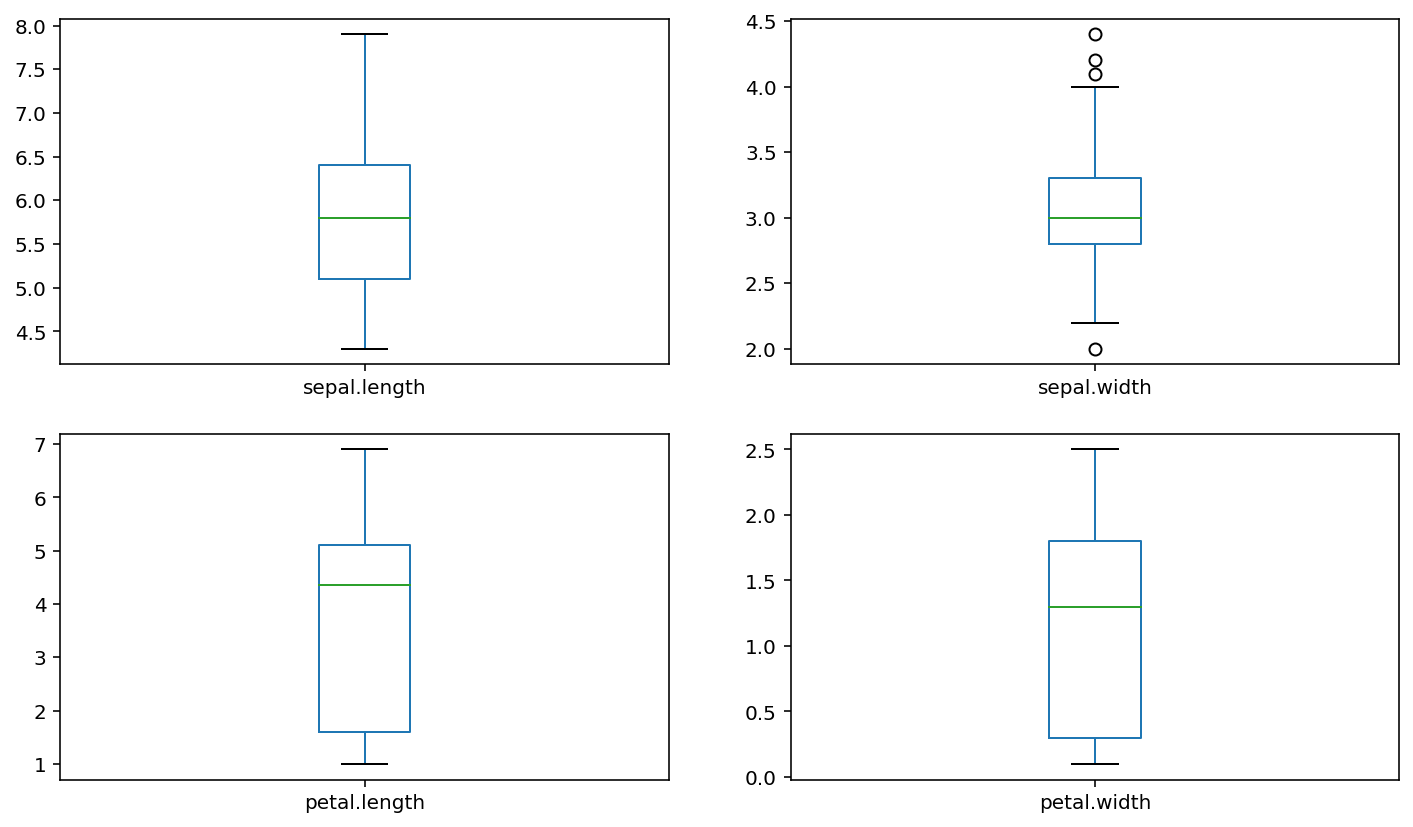

In [17]:
iris.plot(kind = 'box',subplots = True,layout=(2,2)) 
plt.show()

We can using seaborn make above figures looks better 

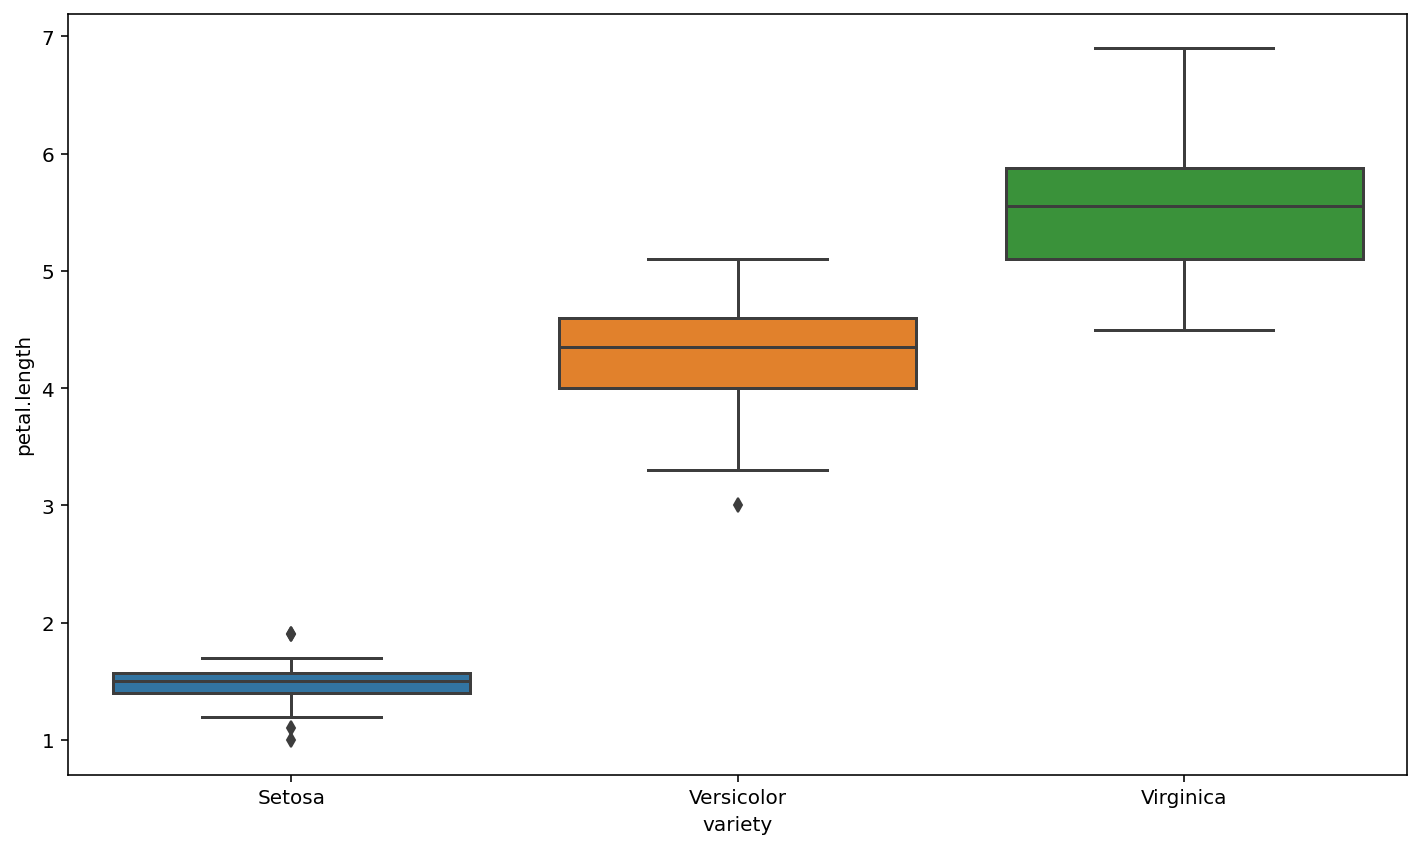

In [22]:
sns.boxplot(x="variety", y="petal.length", data=iris)
plt.show()

Seaborn also has Violin plots, Violin plots are used to show the distribution of data and its probability density. This chart combines the features of box and density charts. 

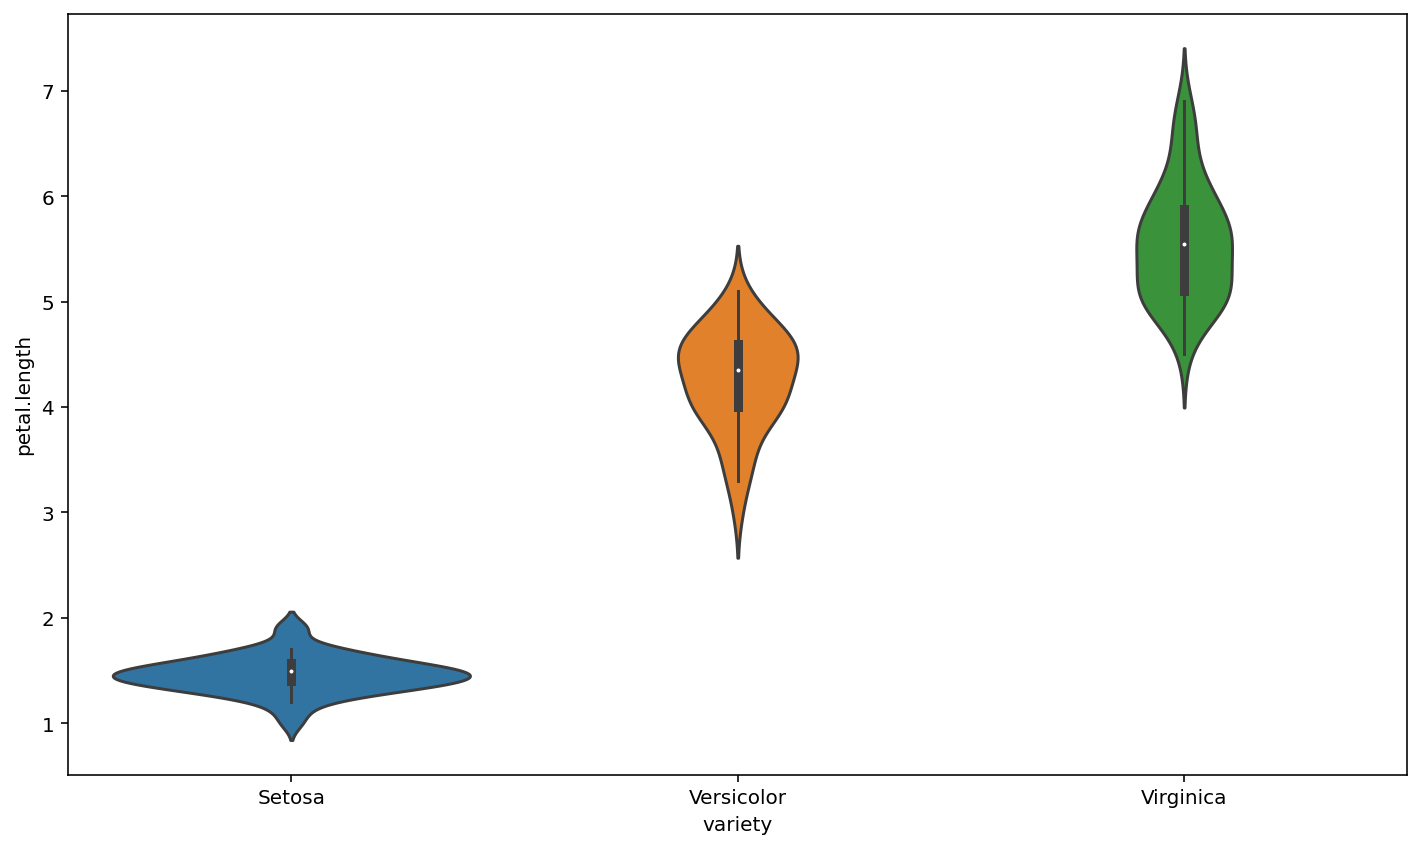

In [23]:
sns.violinplot(x="variety", y="petal.length", data=iris) 
plt.show()

### Pairplot

If we want to know the relationship between two variables, above methods do not seem to work. pairplot () method is used in SNS to compare the relationship between two variables. 

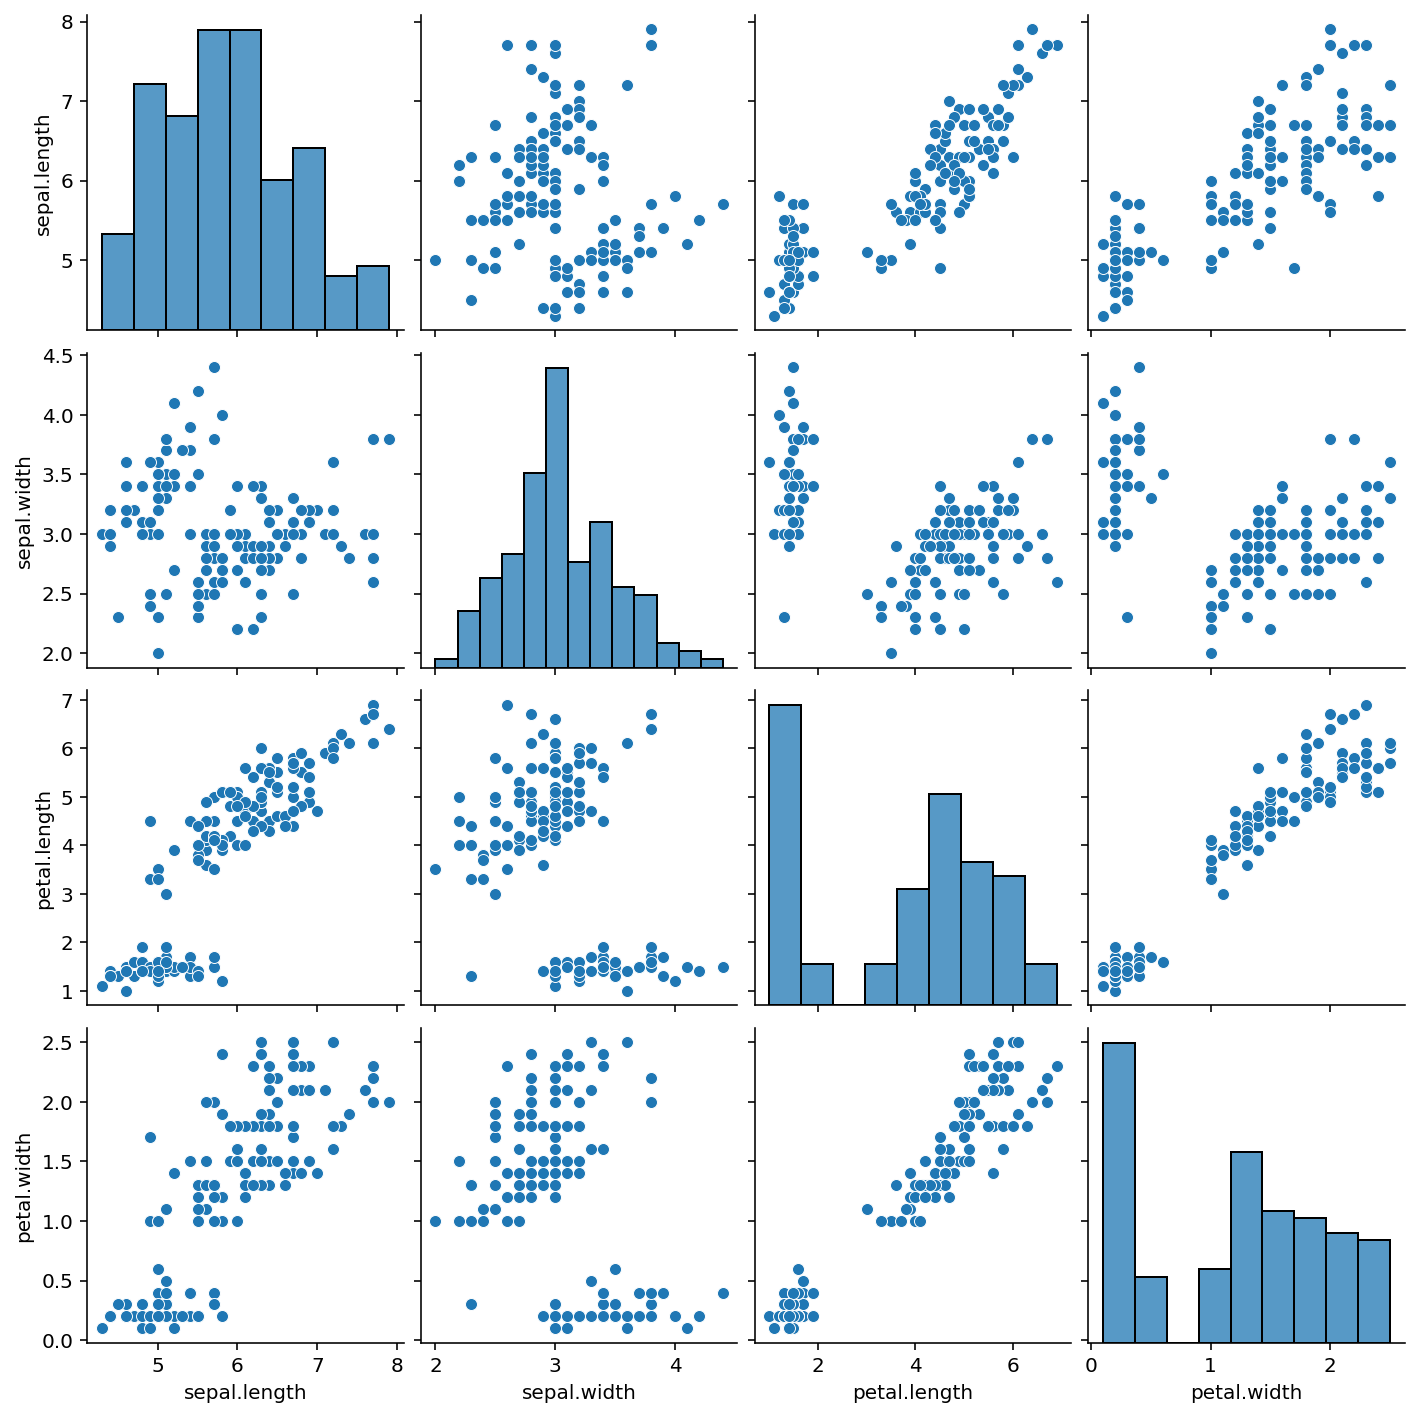

In [25]:
sns.pairplot(iris) 
plt.show()

The histogram (distribution diagram) of each attribute can be seen on the diagonal, and the correlation diagram between two different attributes on the side. From the figure, we can find that there is a relatively obvious correlation between petal length and petal width. 

Color can be added by using ‘Hue’ , kind = 'reg' to add a regression line 

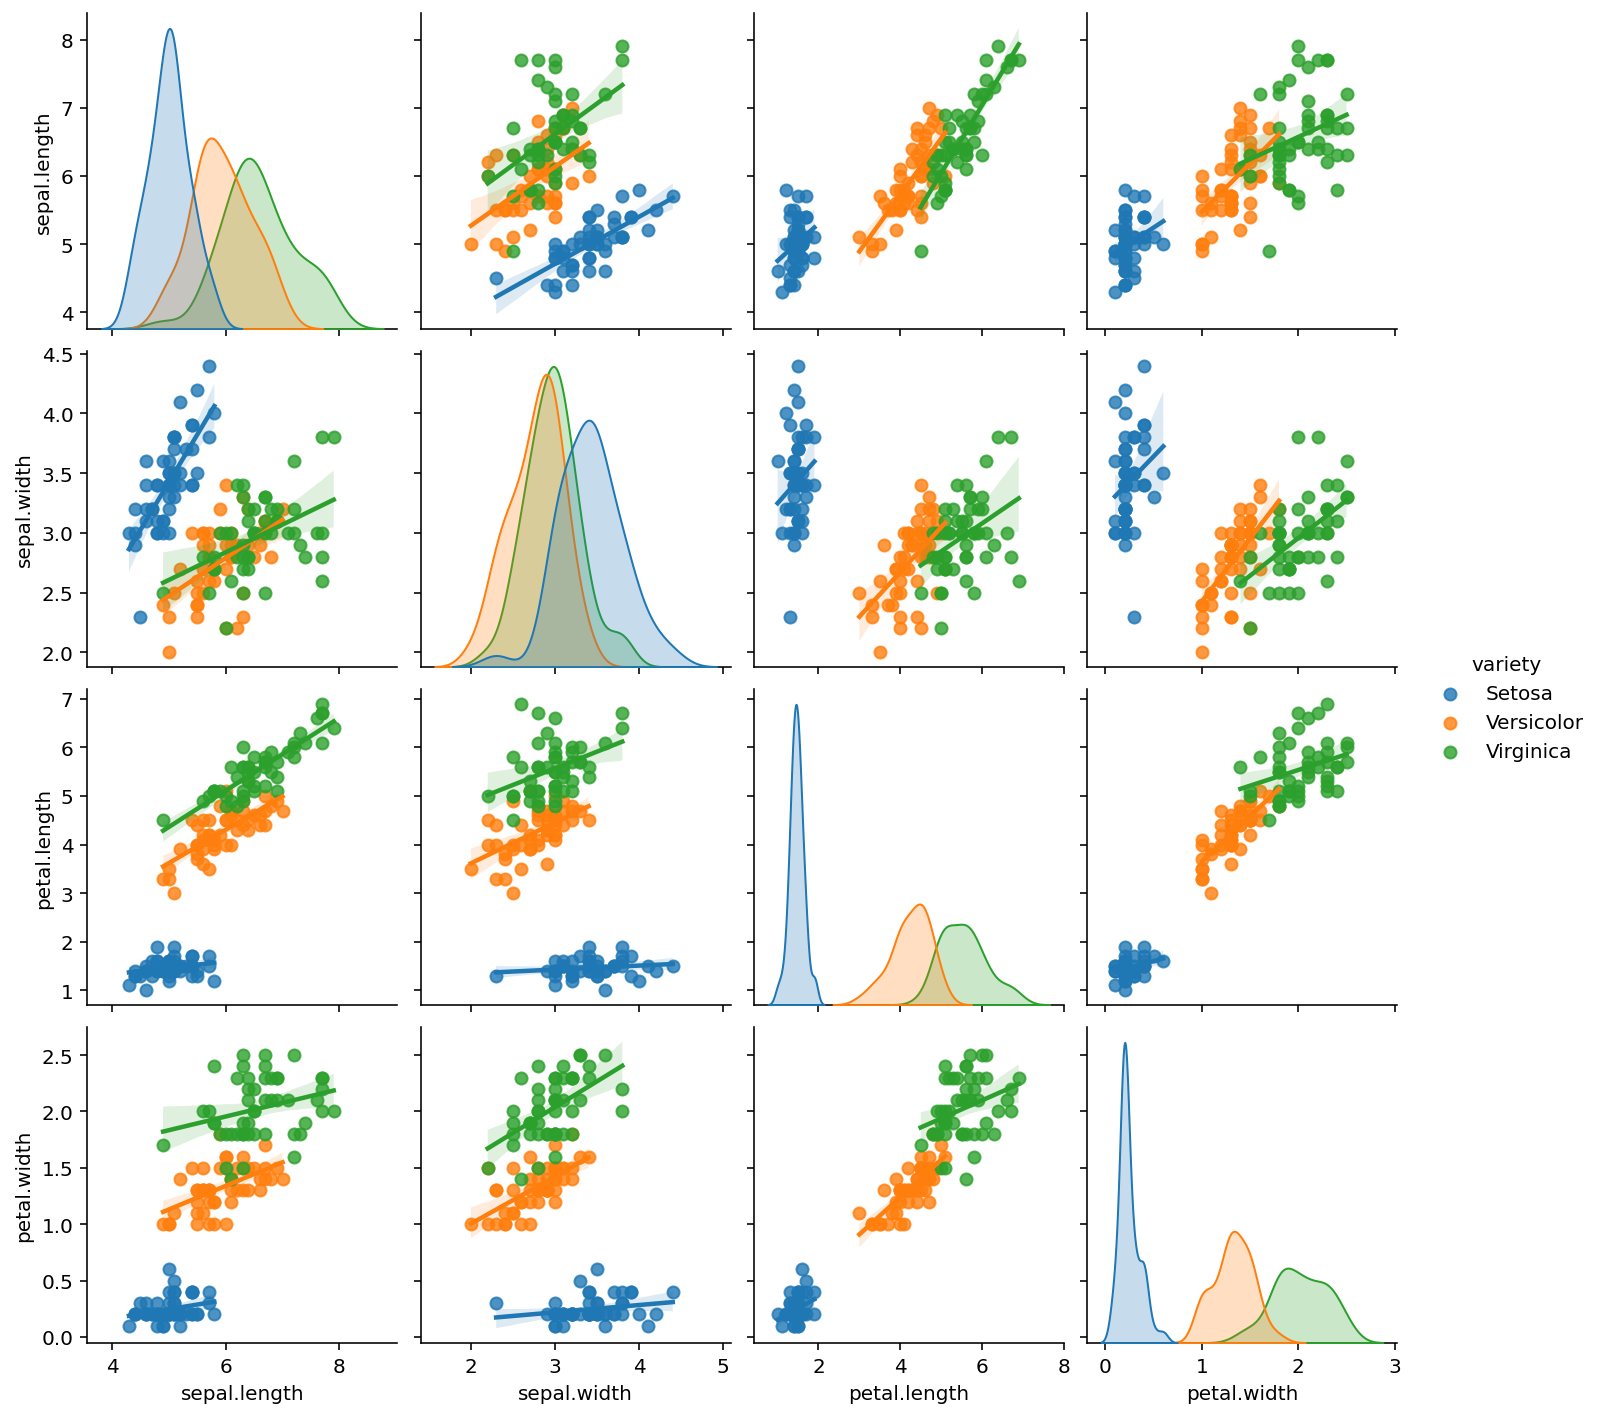

In [27]:
sns.pairplot(iris,kind = 'reg', hue='variety') 
plt.show()

By using ‘vars’ we can focus on specific two variables:

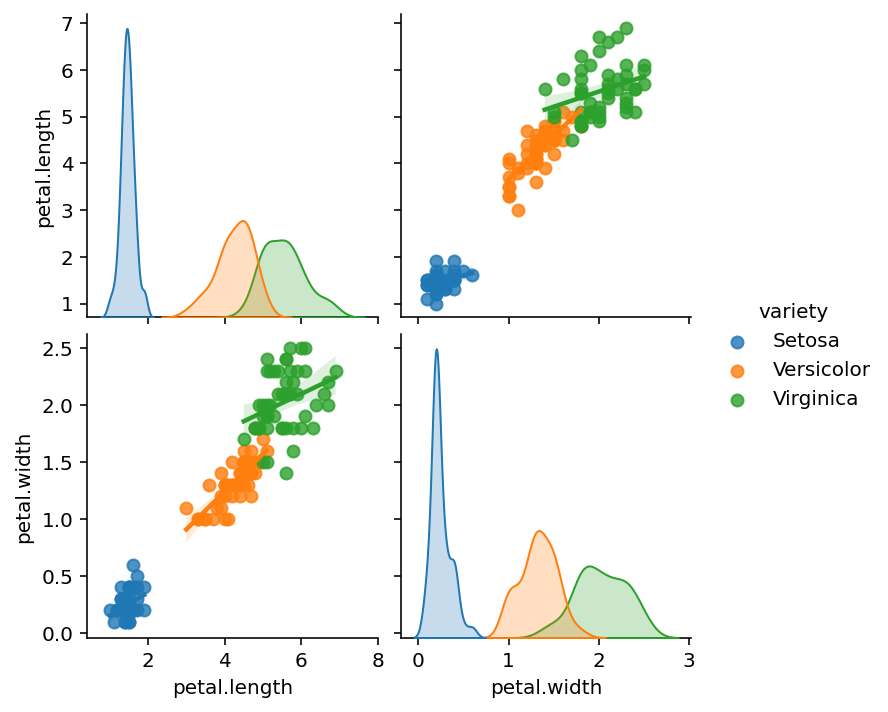

In [29]:
sns.pairplot(iris,kind='reg',hue='variety' ,vars=['petal.length','petal.width']) 
plt.show()

### Heat Map

We also learned heat map to represent data 


```{note}
Our iris data format not fit the heatmap, So we need reformat and reload
```


In [42]:
iris = pd.read_csv("Iris2.csv")

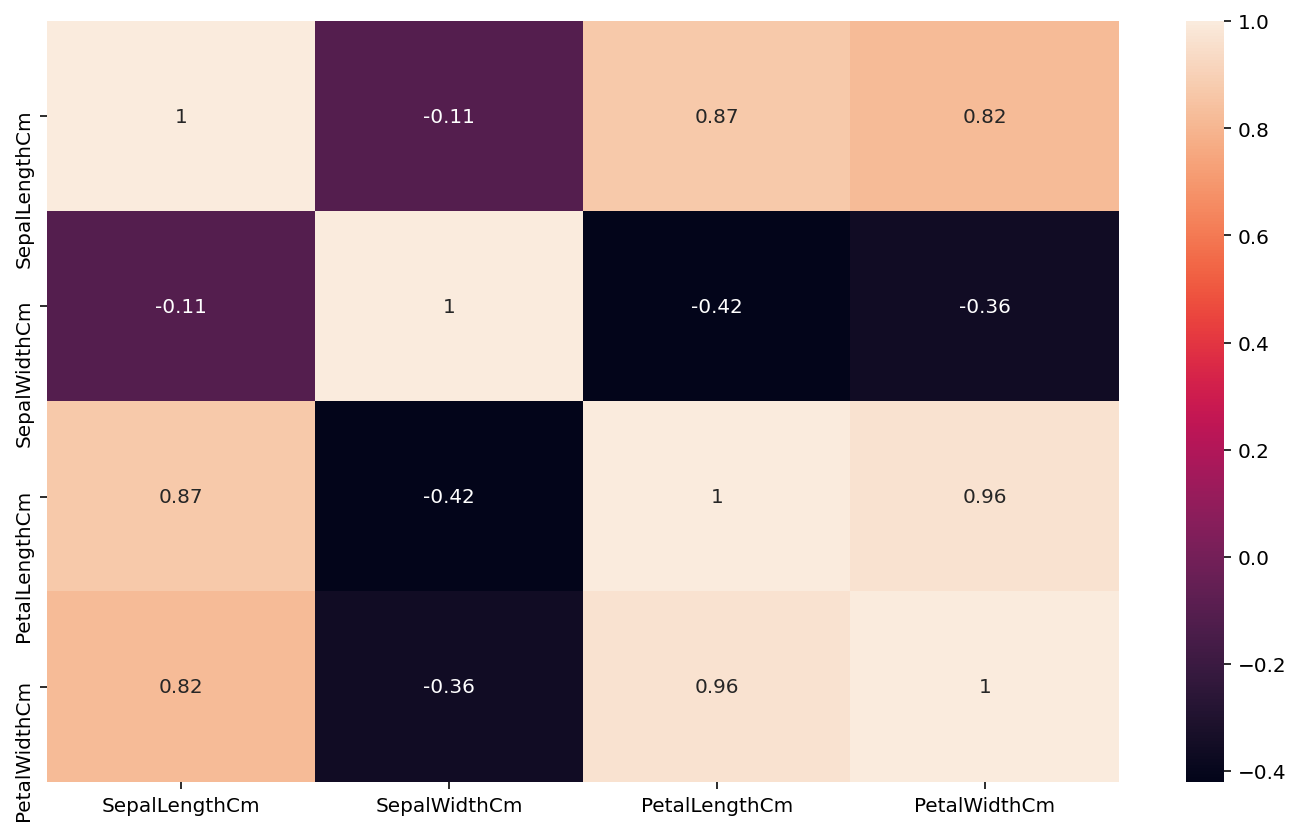

In [43]:
f = iris.drop("Id", axis=1).corr()
sns.heatmap(f, annot=True)
plt.show()

This is known as Pearson's Petal correlation, with light colors, as in petal length versus petal width, with a correlation of 0.96, this mean is a large flower. 

  

This image is helpful for data exploration. 

  

### 3D scatter plot 

Finally, we can integrate all data into a 3D scatter plot 

In [40]:
# import 3D figures package
from mpl_toolkits.mplot3d import Axes3D

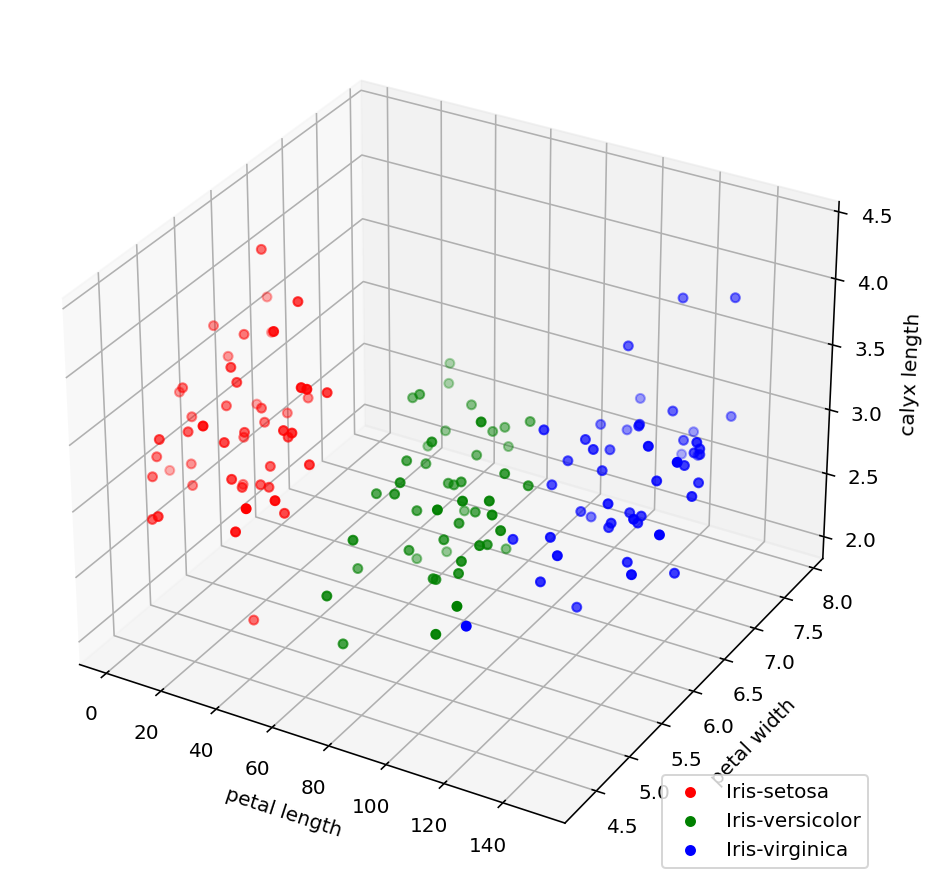

In [41]:
Y = iris['Species'].values
X = iris.drop('Species',axis = 1).values

fig = plt.figure(figsize = (6,6))
ax1 = Axes3D(fig)

for lab,color,category in zip(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],['red','green','blue'],['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']):
    ax1.scatter3D(X[Y == lab,0],X[Y == lab,1],X[Y == lab,2],label = category,c = color)

ax1.set_xlabel('petal length')
ax1.set_ylabel('petal width')
ax1.set_zlabel('calyx length')
ax1.legend(loc = 'lower right')
plt.show()

## References

[1] [Seaborn: statistical data visualization](https://seaborn.pydata.org)
<br>
[2] [Iris flower data set](https://gist.github.com/netj/8836201)
<br>
[3] [PCA of the Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)